# Medical Insurance Premium Predictor

In this project, we developed a predictive model to estimate yearly medical insurance premiums based on various features such as age, BMI, smoking status, and region. The project leverages exploratory data analysis (EDA) and visualization techniques to gain insights into the dataset before applying a Linear Regression model.

### Data Preprocessing
* **Exploratory Data Analysis (EDA):**
We began by conducting an in-depth EDA to understand the relationships between the features and the target variable, which is the yearly medical insurance premium. This step included:

    Visualizing the distribution of the premiums and identifying patterns across different demographic groups.
    Analyzing the correlation between features like age, BMI, and smoking status with insurance costs.
    
    
* **Data Cleaning and Processing:** Next, the dataset was meticulously processed to ensure it was ready for model training:

    * Outlier Treatment: Outliers were identified and appropriately treated to prevent them from skewing the model.

    * Handling Missing Values: Any null values present in the dataset were handled using imputation techniques to maintain data integrity.

    * Standardization: The dataset was standardized to ensure that features were on a comparable scale, which is crucial for model accuracy.

    * One Hot Encoding (OHE): Categorical variables, such as region and smoking status, were converted into numerical representations using One Hot Encoding to make them suitable for model input.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Dataset Description:
- Age : Age of the person (Numerical Data)
- Sex : Gender of the person [male or female] (Nominal Categorical Data)
- BMI : Body mass index of the person (Numerical Data)
- Children : No. of children the person is having (Ordinal Categorical Data)
- Smoker :  Whether the person is a smoker or not (Nominal Categorical Data)
- Region : Region the person belongs to (Ordinal Categorical Data)
- Charges : Individual medical costs billed by health insurance (Numerical Data)


### EDA and Visualisation 
**Checking for data types and null values in dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***Observation** : No null values and datatype of each feature is appropriate*

**Descriptive statistics of Data**

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
pd.crosstab(index = df['sex'], columns = [df['region'], df['smoker']], margins = True)

region northeast     northwest     southeast     southwest       All
smoker        no yes        no yes        no yes        no yes      
sex                                                                 
female       132  29       135  29       139  36       141  21   662
male         125  38       132  29       134  55       126  37   676
All          257  67       267  58       273  91       267  58  1338

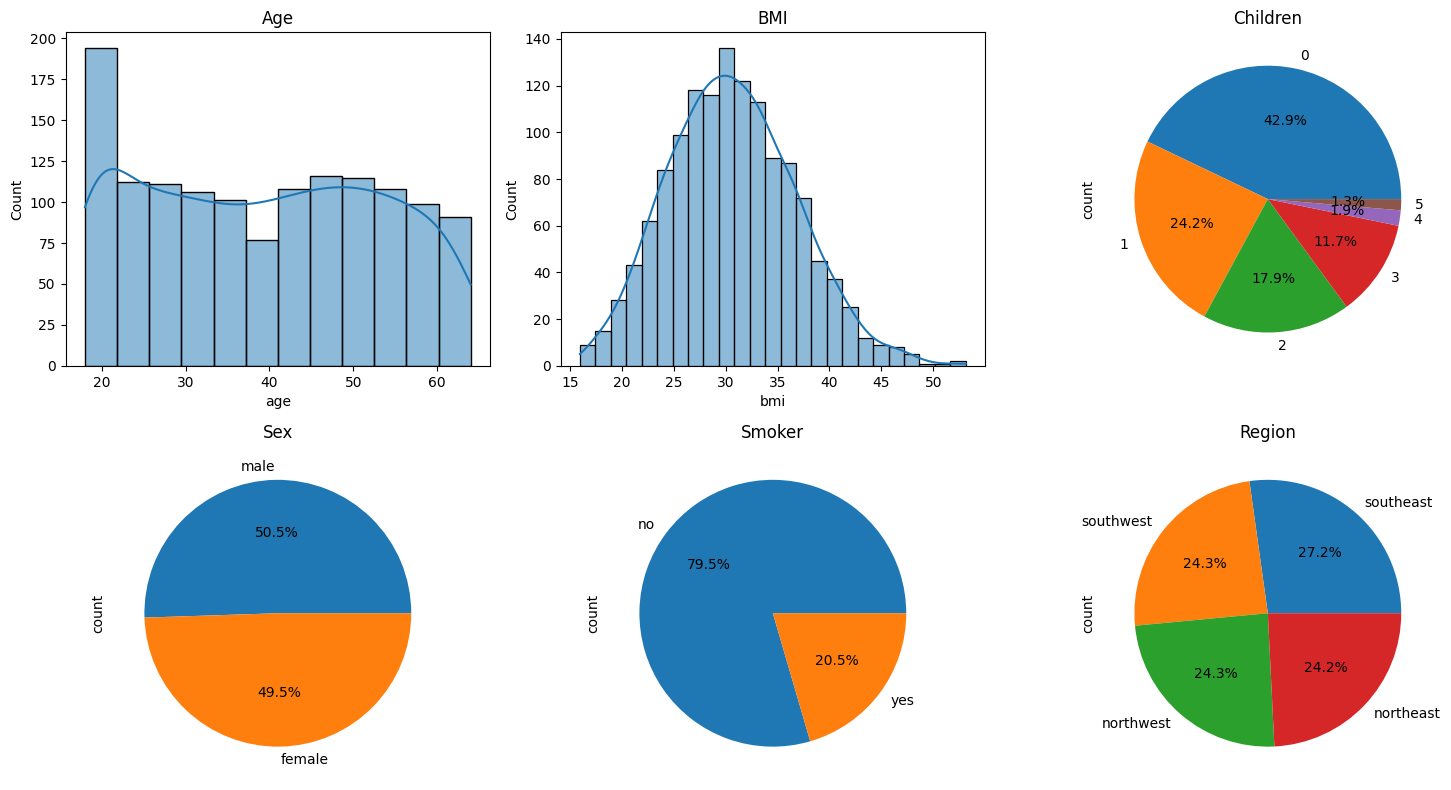

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
sns.histplot(data=df,x='age',kde=True,ax=axes[0,0])
axes[0, 0].set_title("Age")

sns.histplot(data=df,x='bmi',kde=True,ax=axes[0,1])
axes[0, 1].set_title("BMI")

#sns.histplot(data=df,x='charges',kde=True,ax=axes[0,2])
axes[0, 2].set_title("Children")
df['children'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=axes[0,2])

axes[1, 0].set_title("Sex")
df['sex'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=axes[1,0])

axes[1, 1].set_title("Smoker")
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=axes[1,1])

axes[1, 2].set_title("Region")
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=axes[1,2])

plt.tight_layout()


***Obseravtions** :* 
- BMI has mean approx 30 and is normal distributed.
- Males and females are approximately equal in number.
- No. of smokers is very less as compared to non smoker
- Approximately same no. of people belongs to each of the 4 region.

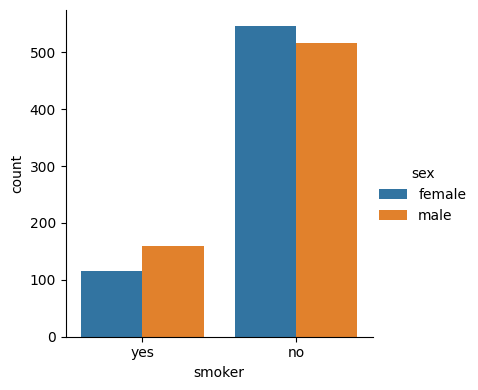

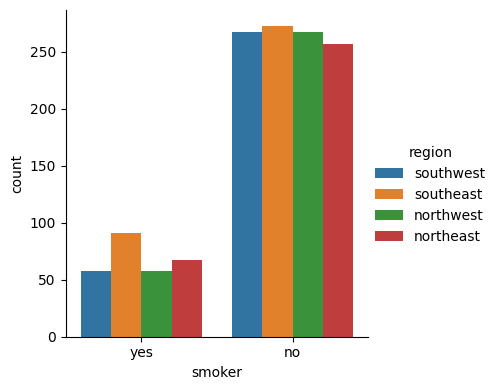

In [7]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df,height=4)

sns.catplot(x="smoker", kind="count",hue = 'region', data=df,height=4)


**Observations**: 
- No. of male smokers is more than female smokers.
- No. of female non smokers is higher than male non smokers.
- Overall the no. of non-smokers is higher than smokers.
- More no. of non smokers than smokers in every region.

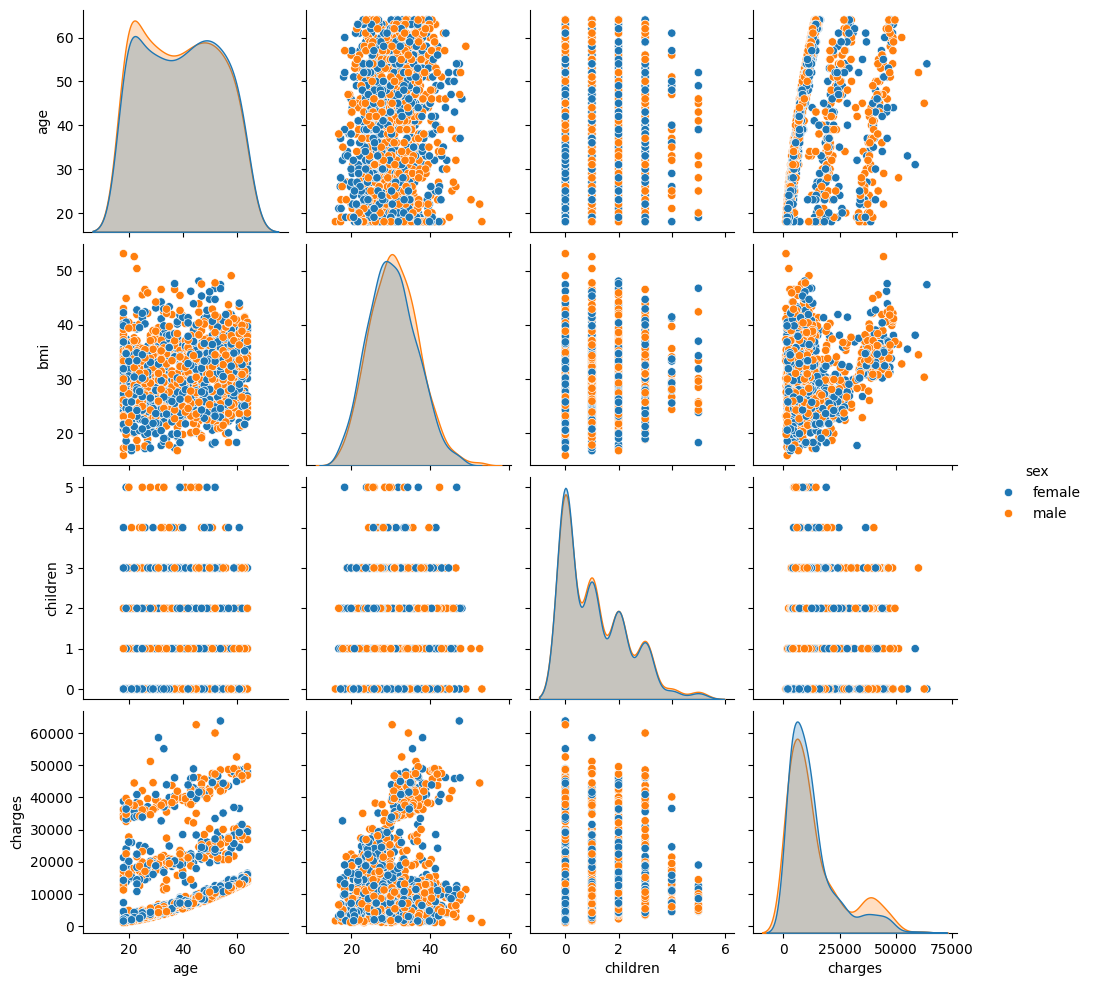

In [8]:
sns.pairplot(df, hue='sex')
plt.show()

***Observations**:*
- In the scatter plot between age and charges, majority of points indicates charges tend to increase with increase in age.
- In other plots we cannot find a trend.

#### Skewness detection and treatment

In [9]:
for ele in ['age','bmi','children','charges']:
    print("The skew for",ele, ": ",df[ele].skew())

The skew for age :  0.05567251565299186
The skew for bmi :  0.2840471105987448
The skew for children :  0.9383804401702414
The skew for charges :  1.5158796580240388


The skew for children and charges are higher than 0.5 so they can be considered skewed data

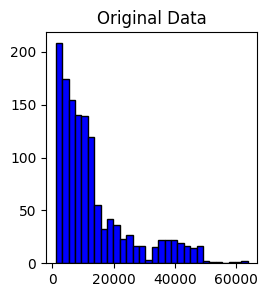

In [10]:
from scipy.stats import skew

# Visualize the original data
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.hist(df['charges'], bins=30, color='blue', edgecolor='black')
plt.show()

In [11]:
# Calculate the skewness before transformation
original_skewness = skew(df['charges'])
print(f'Original Skewness: {original_skewness}')

Original Skewness: 1.5141797118745743


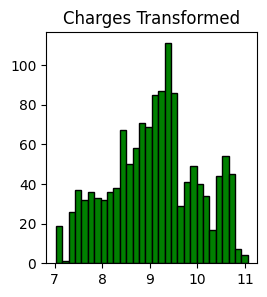

In [12]:
# Apply logarithmic transformation
df['charges'] = np.log1p(df['charges'])

# Visualize the transformed data
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.title('Charges Transformed')
plt.hist(df['charges'], bins=30, color='green', edgecolor='black')
plt.show()

In [13]:
# Calculate the skewness after transformation
transformed_skewness = skew(df['charges'])
print(f'Transformed Skewness: {transformed_skewness}')

Transformed Skewness: -0.08971656400110974


#### Outlier Detection and treatment

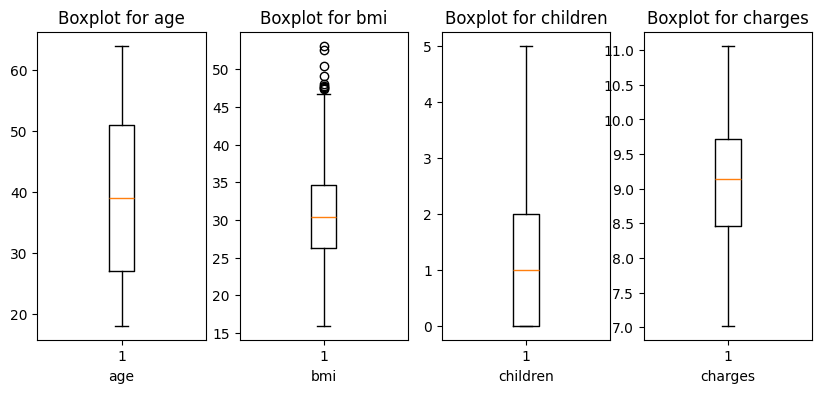

In [14]:
fig, axes= plt.subplots(1,4, figsize = (10,4))

numerical_col = ["age", "bmi", "children", "charges"]

for j,column in enumerate(numerical_col):
    axes[j].boxplot(df[column])
    axes[j].set_xlabel(column)
    axes[j].set_title(f"Boxplot for {column}")

In [15]:
# Check for outliers in the 'charges' column

# Calculate the interquartile range (IQR)
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the bounds
df['charges'] = df['charges'].clip(lower=lower_bound, upper=upper_bound)

In [16]:
# Check for outliers in the 'bmi' column

# Calculate the interquartile range (IQR)
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the bounds
df['bmi'] = df['bmi'].clip(lower=lower_bound, upper=upper_bound)

#### One Hot Encoding

In [17]:
df = pd.get_dummies(df, columns=['smoker', 'region', 'sex'])
df

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,9.734236,False,True,False,False,False,True,True,False
1,18,33.770,1,7.453882,True,False,False,False,True,False,False,True
2,28,33.000,3,8.400763,True,False,False,False,True,False,False,True
3,33,22.705,0,9.998137,True,False,False,True,False,False,False,True
4,32,28.880,0,8.260455,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268755,True,False,False,True,False,False,False,True
1334,18,31.920,0,7.699381,True,False,True,False,False,False,True,False
1335,18,36.850,0,7.396847,True,False,False,False,True,False,True,False
1336,21,25.800,0,7.605365,True,False,False,False,False,True,True,False


In [18]:
def func(x):
    if x==True:
        return 1
    else:
        return 0

df["sex_female"] = df["sex_female"].apply(func)
df["sex_male"] = df["sex_male"].apply(func)
df["smoker_no"] = df["smoker_no"].apply(func)
df["smoker_yes"] = df["smoker_yes"].apply(func)
df["region_northeast"] = df["region_northeast"].apply(func)
df["region_northwest"] = df["region_southwest"].apply(func)
df["region_southeast"] = df["region_southeast"].apply(func)
df["region_southwest"] = df["region_southwest"].apply(func)

df.head()

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,9.734236,0,1,0,1,0,1,1,0
1,18,33.770,1,7.453882,1,0,0,0,1,0,0,1
2,28,33.000,3,8.400763,1,0,0,0,1,0,0,1
3,33,22.705,0,9.998137,1,0,0,0,0,0,0,1
4,32,28.880,0,8.260455,1,0,0,0,0,0,0,1


#### Heat Map

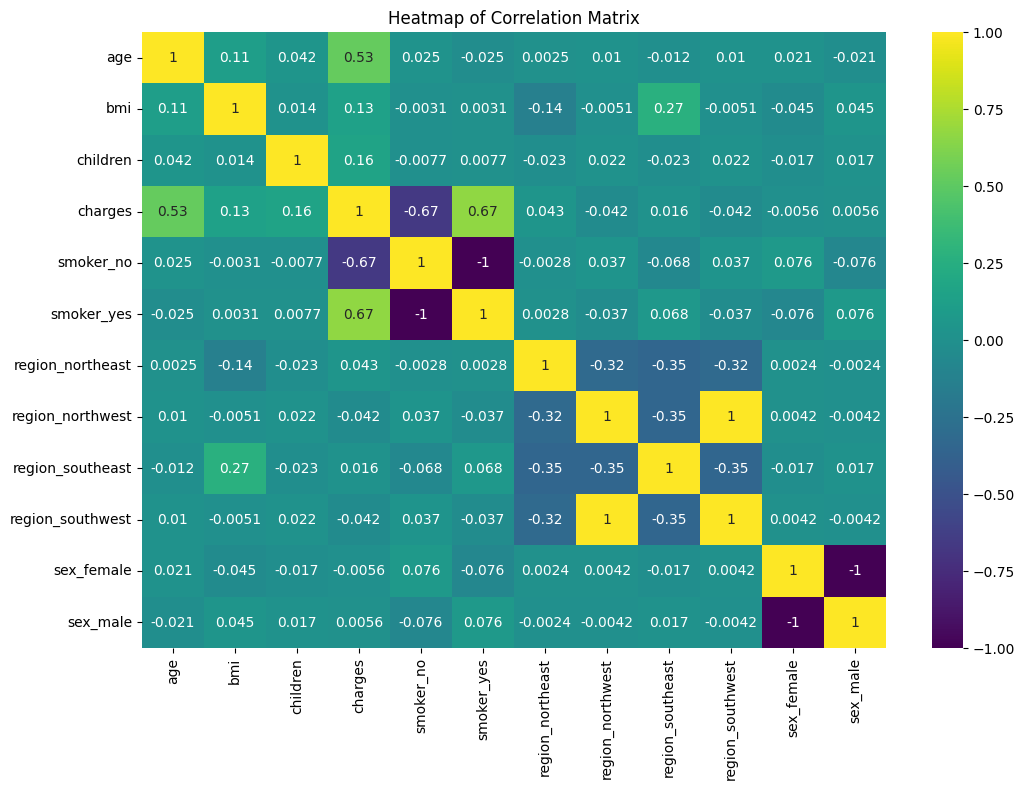

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Observations from heat map :
- Smoker feature is highly correlated with charges.
- Age and BMI features have low correlation coffecients with charges.
- All other variables have very low correlation coffecients with charges.

#### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
target = df['charges']
features = df.drop('charges', axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)


#### Standardization of Data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)


In [22]:
scal = StandardScaler()
y_train = np.array(y_train).reshape(-1, 1)

# Reshape y_test
y_test = np.array(y_test).reshape(-1, 1)
scal.fit(y_train)
y_train = scal.transform(y_train)
y_test = scal.transform(y_test)

In [23]:
print(x_test[0])
print(y_test[0])

[-0.15573994 -0.50004709  1.60366094  0.50966434 -0.50966434 -0.56912549
 -0.56254395 -0.61852256 -0.56254395  1.00428267 -1.00428267]
[-0.22078006]


#### Training the Model

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
regressor = SGDRegressor(max_iter=100, alpha=0.01, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

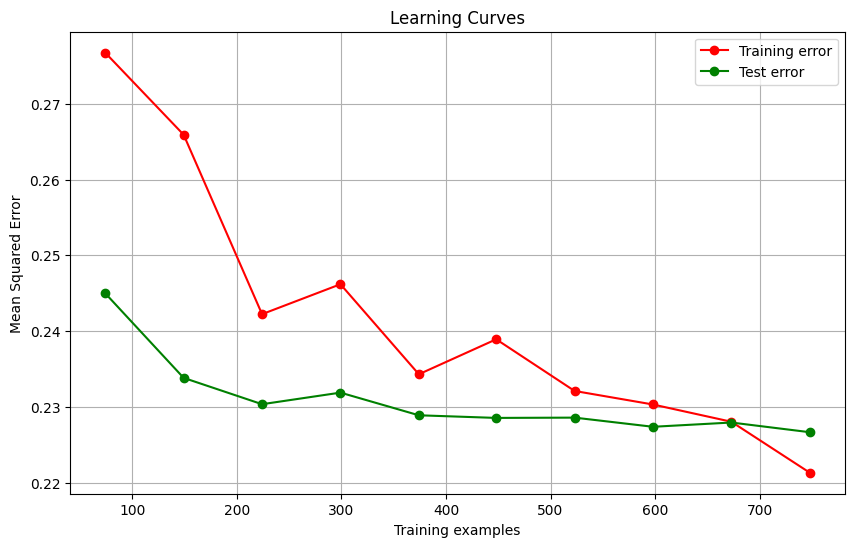

In [26]:
from sklearn.model_selection import learning_curve
def plot_learning_curves(model, X, y):    
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')    
    train_errors_mean = -np.mean(train_scores, axis=1)    
    test_errors_mean = -np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r", label="Training error") 
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g", label="Test error")
    plt.title("Learning Curves")
    plt.xlabel("Training examples")    
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize your model (for example, Linear Regression)

# Plot learning curves

plot_learning_curves(regressor, x_train, y_train)

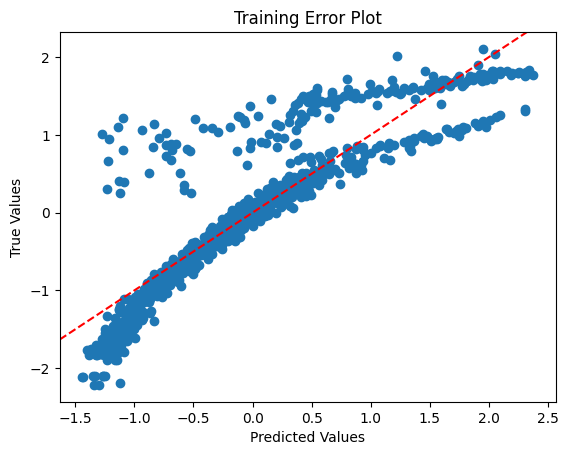

In [27]:
y_train_pred = regressor.predict(x_train)
plt.scatter(y_train_pred, y_train)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Training Error Plot')
plt.axline(xy1=(0,0),slope=1, color='red', linestyle='--')
plt.show()

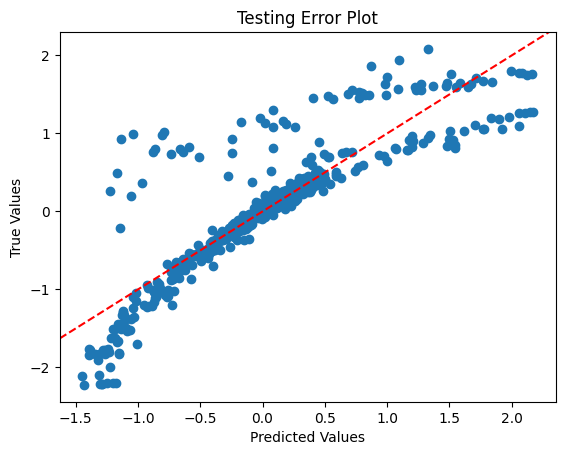

In [28]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Testing Error Plot')
plt.axline(xy1=(0,0),slope=1, color='red', linestyle='--')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
#Testing Error
mse_test = mean_squared_error(y_test, y_pred)
mse_test

0.2338436613012417

In [31]:
#Training Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

0.22160567405629067

In [32]:
# Get the initial weight parameters (slope and intercept)
initial_slope = regressor.coef_[0]
initial_intercept = regressor.intercept_
slope_values = np.linspace(-2, 3, 1000)  # Adjust the range as needed

cost_values = []

for slope in slope_values:
    # Create a new model with the adjusted slope and the initial intercept
    regressor.coef_[0] = slope
    regressor.intercept_ = initial_intercept

    # Make predictions using the modified model
    y_pred = regressor.predict(x_test)

    # Calculate the mean squared error (MSE) for this slope
    mse = mean_squared_error(y_test, y_pred)
    cost_values.append(mse)

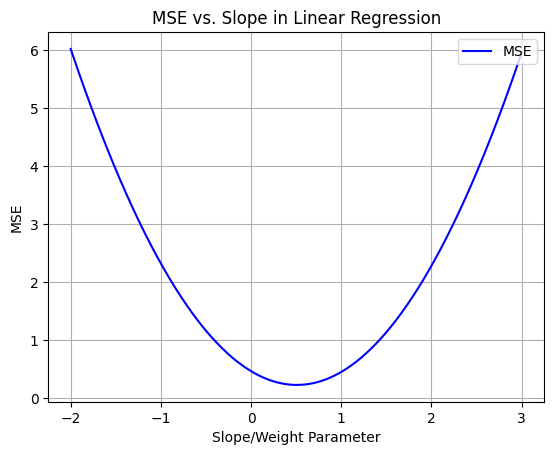

In [33]:
plt.figure()
plt.plot(slope_values, cost_values, '-b', label='MSE')
plt.xlabel('Slope/Weight Parameter')
plt.ylabel('MSE')
plt.title('MSE vs. Slope in Linear Regression')
plt.legend(loc='upper right')
plt.grid()
plt.show()

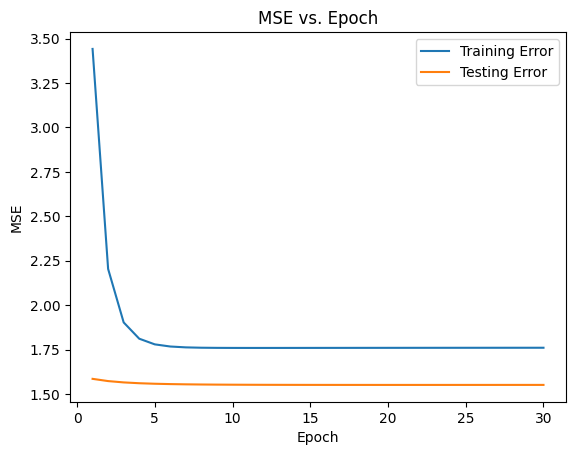

In [34]:
mse_values = []

# Perform gradient descent and track cost values at each epoch
for epoch in range(30):
    regressor.partial_fit(x_train, y_train)
    mse = ((x_train.dot(regressor.coef_) - y_train) ** 2).mean()
    mse_values.append(mse)




mse_values_test = []

# Perform gradient descent and track cost values at each epoch
for epoch in range(30):
    regressor.partial_fit(x_test, y_test)
    mse = ((x_test.dot(regressor.coef_) - y_test) ** 2).mean()
    mse_values_test.append(mse)

# Plot the cost function values with respect to the epoch
plt.plot(range(1, len(mse_values) + 1), mse_values, label='Training Error')
plt.plot(range(1, len(mse_values) + 1), mse_values_test, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.legend()
plt.show()